In [2]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from pytablewriter import MediaWikiTableWriter
import plotly.express as px

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
game_data = data_loader.load_game_data(seasons=None)

Loaded PBP-data


In [51]:
game_data

,play_count,season_name,visitor_team_id,visitor_team_city,visitor_team_nickname,visitor_final_score,home_final_score,home_win,home_team_id,home_team_city,home_team_nickname,periods,minutes_played,visitor_players_deployed,home_players_deployed,visitor_fg_made,visitor_fg_missed,visitor_3PT_made,visitor_3PT_missed,home_fg_made,home_fg_missed,home_3PT_made,home_3PT_missed,visitor_ft_made,visitor_ft_missed,home_ft_made,home_ft_missed,visitor_rebound,home_rebound,visitor_team_rebound,home_team_rebound,visitor_turnover,home_turnover,visitor_team_turnover,home_team_turnover,visitor_foul,home_foul,visitor_subs,home_subs,visitor_timeout,home_timeout,visitor_jump_balls_won,home_jump_balls_won,tip_off_winner,visitor_ejection,home_ejection,visitor_team_ejection,home_team_ejection,home_scoring_leader,home_scoring_leader_points,visitor_scoring_leader,visitor_scoring_leader_points
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000001,429,2000-01,1610612755.0,Philadelphia,76ers,101,72,False,1610612752.0,New York,Knicks,4,48.00,12,12,38,28,3,5,25,45,3,8,22,8,19,5,37,37,2,3,13,22,1,0,25,30,20,17,3,7,1,2,HOME_PLAYER,0,0,0,0,275,21.00,947,25.00
20000002,510,2000-01,1610612739.0,Cleveland,Cavaliers,86,82,False,1610612751.0,New Jersey,Nets,4,48.00,11,10,32,46,2,5,31,54,3,7,20,12,17,9,52,47,6,6,19,12,0,3,28,31,24,21,6,8,1,1,HOME_PLAYER,0,0,0,0,1425,20.00,441,17.00
20000003,478,2000-01,1610612764.0,Washington,Wizards,86,97,True,1610612753.0,Orlando,Magic,4,48.00,12,10,33,39,4,3,34,45,6,10,16,8,23,10,44,37,5,7,26,15,1,0,28,24,28,18,7,5,0,1,HOME_PLAYER,0,0,0,0,1503,32.00,1732,16.00
20000004,448,2000-01,1610612766.0,Charlotte,Hornets,106,82,False,1610612737.0,Atlanta,Hawks,4,48.00,11,11,35,27,5,4,30,51,6,9,31,9,16,5,44,29,3,7,17,13,0,0,22,32,17,27,5,5,1,1,HOME_PLAYER,0,0,0,0,673,23.00,469,23.00
20000005,505,2000-01,1610612765.0,Detroit,Pistons,104,95,False,1610612761.0,Toronto,Raptors,4,48.00,12,11,44,49,3,9,35,58,5,12,13,5,20,11,45,48,9,13,12,15,0,0,27,21,30,18,5,7,1,0,VISITOR_PLAYER,0,0,0,0,1713,26.00,711,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801226,474,2018-19,1610612760.0,Oklahoma City,Thunder,127,116,False,1610612749.0,Milwaukee,Bucks,4,48.00,11,8,48,51,23,31,43,57,15,31,8,5,15,6,53,53,1,7,12,14,1,1,20,14,23,17,3,6,1,0,VISITOR_PLAYER,0,0,0,0,204025,29.00,203471,32.00
21801227,443,2018-19,1610612742.0,Dallas,Mavericks,94,105,True,1610612759.0,San Antonio,Spurs,4,48.00,10,13,37,54,11,26,41,47,8,16,9,3,15,3,42,53,4,5,7,10,0,1,19,14,23,28,6,6,0,2,HOME_PLAYER,0,0,0,0,200746,34.00,1717,20.00
21801228,434,2018-19,1610612750.0,Minnesota,Timberwolves,95,99,True,1610612743.0,Denver,Nuggets,4,48.00,10,9,39,52,13,19,39,48,10,23,4,2,11,6,41,53,6,5,10,12,0,1,22,13,21,19,7,5,2,1,HOME_PLAYER,0,0,0,0,203999,29.00,203952,25.00


In [52]:
game_data.nunique()

play_count                       268
season_name                       19
visitor_team_id                   30
visitor_team_city                 34
visitor_team_nickname             32
visitor_final_score              101
home_final_score                  97
home_win                           2
home_team_id                      30
home_team_city                    34
home_team_nickname                32
periods                            5
minutes_played                     5
visitor_players_deployed           9
home_players_deployed              9
visitor_fg_made                   45
visitor_fg_missed                 54
visitor_3PT_made                  27
visitor_3PT_missed                39
home_fg_made                      43
home_fg_missed                    55
home_3PT_made                     28
home_3PT_missed                   42
visitor_ft_made                   47
visitor_ft_missed                 23
home_ft_made                      48
home_ft_missed                    27
v

In [93]:
for team in ["visitor","home"]:
    game_data[f"{team}_fg_percent"] = game_data[f"{team}_fg_made"] / (game_data[f"{team}_fg_made"] + game_data[f"{team}_fg_missed"])
    game_data[f"{team}_3PT_percent"] = game_data[f"{team}_3PT_made"] / (game_data[f"{team}_3PT_made"] + game_data[f"{team}_3PT_missed"])
    game_data[f"{team}_2PT_percent"] = (game_data[f"{team}_fg_made"] - game_data[f"{team}_3PT_made"]) / ((game_data[f"{team}_fg_made"] + game_data[f"{team}_fg_missed"]) - (game_data[f"{team}_3PT_made"] + game_data[f"{team}_3PT_missed"]))
    game_data[f"{team}_ft_percent"] = game_data[f"{team}_ft_made"] / (game_data[f"{team}_ft_made"] + game_data[f"{team}_ft_missed"])


In [159]:
game_data["home_fg_percent_win"] = game_data["visitor_fg_percent"] <= game_data["home_fg_percent"]
game_data["home_fg_attempts"] = game_data["home_fg_made"] + game_data["home_fg_missed"]
game_data["visitor_fg_attempts"] = game_data["visitor_fg_made"] + game_data["visitor_fg_missed"]
game_data["home_fg_attempt_win"] = game_data["visitor_fg_made"] + game_data["visitor_fg_missed"] <= game_data["home_fg_made"] + game_data["home_fg_missed"]
game_data["home_ft_percent_win"] = game_data["visitor_ft_percent"] <= game_data["home_ft_percent"]
game_data["home_3PT_percent_win"] = game_data["visitor_3PT_percent"] <= game_data["home_3PT_percent"]
game_data["home_2PT_percent_win"] = game_data["visitor_2PT_percent"] <= game_data["home_2PT_percent"]
game_data["home_rebound_win"] = game_data["visitor_rebound"] <= game_data["home_rebound"]
game_data["3PT_predict"] = game_data["home_3PT_percent_win"]==game_data["home_win"]
game_data["2PT_predict"] = game_data["home_2PT_percent_win"]==game_data["home_win"]
game_data["fg_predict"] = game_data["home_fg_percent_win"]==game_data["home_win"]
game_data["ft_predict"] = game_data["home_ft_percent_win"]==game_data["home_win"]

In [135]:
game_data["season"] = game_data["season_name"].str.split("-").str[0]

In [136]:
fig = px.line(game_data.groupby("season")[["3PT_predict","2PT_predict","fg_predict","ft_predict"]].sum().div(game_data.groupby("season").size(),axis=0) ,width=1000, height=800)
fig.show()

In [138]:
#print(game_data.groupby(["home_win","home_fg_percent_win"]).size() / 22965)
#print(game_data.groupby(["home_win","home_ft_percent_win"]).size() / 22965)
#print(game_data.groupby(["home_win","home_3PT_percent_win"]).size() / 22965)
#print(game_data.groupby(["home_win","home_2PT_percent_win"]).size() / 22965)
print(game_data.groupby(["home_win","home_fg_percent_win"]).size() / 22965)
print(game_data.groupby(["home_win","home_fg_attempt_win"]).size() / 22965)

home_win  home_fg_percent_win
False     False                 0.32
          True                  0.08
True      False                 0.12
          True                  0.48
dtype: float64
home_win  home_fg_attempt_win
False     False                 0.17
          True                  0.23
True      False                 0.30
          True                  0.29
dtype: float64


In [60]:
df = player_data.describe().transpose().reset_index()
df["mean"] = df["mean"].round(2)
df["std"] = df["std"].round(2)
df["Description"] = "d"
table_writer = MediaWikiTableWriter(dataframe= df[["index","Description","mean","std","min","25%","50%","75%","max"]],add_index_column=True,)

In [180]:
game_data[(game_data["visitor_fg_percent"]>game_data["home_fg_percent"]) & (game_data["home_win"]==False)].shape[0] / 22965

0.31839756150664056

array([[<AxesSubplot:title={'center':'play_count'}>,
        <AxesSubplot:title={'center':'visitor_final_score'}>,
        <AxesSubplot:title={'center':'home_final_score'}>,
        <AxesSubplot:title={'center':'periods'}>,
        <AxesSubplot:title={'center':'visitor_fg_made'}>,
        <AxesSubplot:title={'center':'visitor_fg_missed'}>],
       [<AxesSubplot:title={'center':'visitor_3PT_made'}>,
        <AxesSubplot:title={'center':'visitor_3PT_missed'}>,
        <AxesSubplot:title={'center':'home_fg_made'}>,
        <AxesSubplot:title={'center':'home_fg_missed'}>,
        <AxesSubplot:title={'center':'home_3PT_made'}>,
        <AxesSubplot:title={'center':'home_3PT_missed'}>],
       [<AxesSubplot:title={'center':'visitor_ft_made'}>,
        <AxesSubplot:title={'center':'visitor_ft_missed'}>,
        <AxesSubplot:title={'center':'home_ft_made'}>,
        <AxesSubplot:title={'center':'home_ft_missed'}>,
        <AxesSubplot:title={'center':'visitor_rebound'}>,
        <AxesSubplot:t

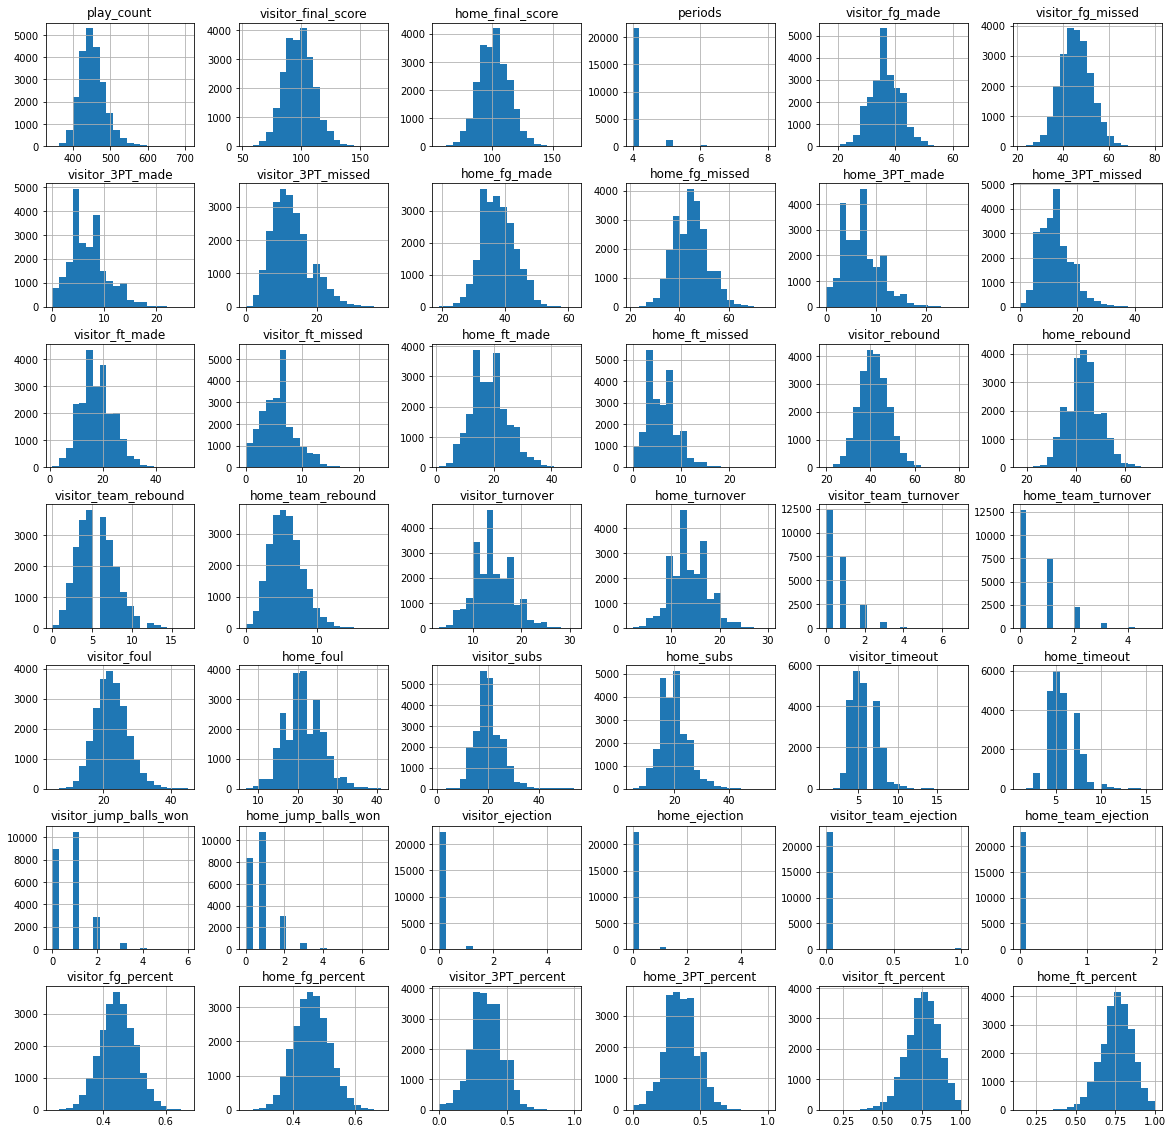

In [250]:
game_data.hist(figsize=(20, 20), bins=20)

<AxesSubplot:xlabel='season_name'>

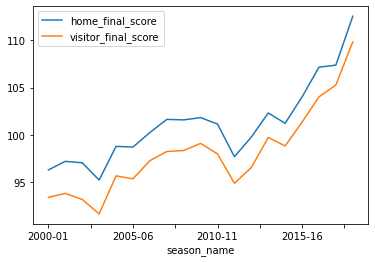

In [269]:
game_data.groupby("season_name")[["home_final_score","visitor_final_score"]].mean().plot()

In [399]:
pbp_data_2018_19.groupby("GAME_ID").apply(lambda x: (
    (x[(x["EVENTMSGTYPE"] == 'FIELD_GOAL_MADE') & (x["HOMEDESCRIPTION"].str.contains('3PT')) & (x["PERSON1TYPE"] == 'HOME_PLAYER')].groupby("PLAYER1_ID").size() * 3).add(
    x[(x["EVENTMSGTYPE"] == 'FIELD_GOAL_MADE') & ((x["HOMEDESCRIPTION"].str.contains('3PT'))==False) & (x["PERSON1TYPE"] == 'HOME_PLAYER')].groupby("PLAYER1_ID").size() * 2, fill_value=0).add(
    x[(x["EVENTMSGTYPE"] == 'FREE_THROW') & ((x["HOMEDESCRIPTION"].str.contains('MISS'))==False) & (x["PERSON1TYPE"] == 'HOME_PLAYER')].groupby("PLAYER1_ID").size(), fill_value=0)
).max()).sort_values()

GAME_ID
21800554    11.0
21800230    13.0
21800299    13.0
21800555    14.0
21800351    14.0
            ... 
21800646    57.0
21800925    58.0
21800659    58.0
21800225    60.0
21801084    61.0
Length: 1230, dtype: float64

In [3]:
pbp_data_2018_19 = data_loader.load_data(seasons=["2018-19"])

In [8]:
grouped = pbp_data_2018_19.groupby("GAME_ID")

In [9]:
grouped.apply(lambda x: (x["EVENTMSGTYPE"] == 'FIELD_GOAL_MADE') & (x["PERSON1TYPE"] == 'VISITOR_PLAYER')).groupby(level=0).sum()

GAME_ID
21800001    34
21800002    33
21800003    42
21800004    40
21800005    25
            ..
21801226    48
21801227    37
21801228    39
21801229    47
21801230    50
Length: 1230, dtype: int64

In [24]:
grouped[grouped["EVENTMSGTYPE"]=="JUMP_BALL"]

KeyError: 'Column not found: False'

In [82]:
game_data["home_scoring_leader_points_of_total"] = game_data["home_scoring_leader_points"] / game_data["home_final_score"]
game_data["visitor_scoring_leader_points_of_total"] = game_data["visitor_scoring_leader_points"] / game_data["visitor_final_score"]

In [420]:
data_loader.load_data(seasons=["2018-19"])

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,season_name
0,0,0,PERIOD_BEGIN,2,21800794,NaN,12:00,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM,2018-19
1,1,0,JUMP_BALL,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,12:00,1,HOME_PLAYER,VISITOR_PLAYER,HOME_PLAYER,1629028,Deandre Ayton,PHX,Phoenix,1610612756.0,Suns,202702,Kenneth Faried,HOU,Houston,1610612745.0,Rockets,1629059,Elie Okobo,PHX,Phoenix,1610612756.0,Suns,NaN,NaN,NaN,9:11 PM,2018-19
2,2,1,TURNOVER,7,21800794,Jackson Bad Pass Turnover (P1.T1),11:39,1,HOME_PLAYER,VISITOR_PLAYER,0,1628367,Josh Jackson,PHX,Phoenix,1610612756.0,Suns,201935,James Harden,HOU,Houston,1610612745.0,Rockets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM,2018-19
3,3,Driving Layup,FIELD_GOAL_MADE,9,21800794,NaN,11:31,1,VISITOR_PLAYER,0,0,201935,James Harden,HOU,Houston,1610612745.0,Rockets,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM,2018-19
4,4,2,FOUL,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),11:31,1,HOME_PLAYER,VISITOR_PLAYER,TIMEOUT,1628969,Mikal Bridges,PHX,Phoenix,1610612756.0,Suns,201935,James Harden,HOU,Houston,1610612745.0,Rockets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,TIMEOUT,634,21801037,NaN,0:04,4,VISITOR_TEAM,0,0,1610612739,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM,2018-19
582464,432,0,SUBSTITUTION,635,21801037,NaN,0:04,4,VISITOR_PLAYER,VISITOR_PLAYER,0,1627790,Ante Zizic,CLE,Cleveland,1610612739.0,Cavaliers,203903,Jordan Clarkson,CLE,Cleveland,1610612739.0,Cavaliers,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM,2018-19
582465,433,Fadeaway Jumper,FIELD_GOAL_MISSED,638,21801037,NaN,0:02,4,VISITOR_PLAYER,0,0,203917,Nik Stauskas,CLE,Cleveland,1610612739.0,Cavaliers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM,2018-19
582466,434,live,REBOUND,639,21801037,Kleber REBOUND (Off:5 Def:7),0:02,4,HOME_PLAYER,0,0,1628467,Maxi Kleber,DAL,Dallas,1610612742.0,Mavericks,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM,2018-19


In [610]:
game_data[game_data["tip_off_winner"]==0]

,play_count,season_name,visitor_team_id,visitor_team_city,visitor_team_nickname,visitor_final_score,home_final_score,home_team_id,home_team_city,home_team_nickname,periods,visitor_fg_made,visitor_fg_missed,visitor_3PT_made,visitor_3PT_missed,home_fg_made,home_fg_missed,home_3PT_made,home_3PT_missed,visitor_ft_made,visitor_ft_missed,home_ft_made,home_ft_missed,visitor_rebound,home_rebound,visitor_team_rebound,home_team_rebound,visitor_turnover,home_turnover,visitor_team_turnover,home_team_turnover,visitor_foul,home_foul,visitor_subs,home_subs,visitor_timeout,home_timeout,visitor_jump_balls_won,home_jump_balls_won,tip_off_winner,visitor_ejection,home_ejection,visitor_team_ejection,home_team_ejection,visitor_fg_percent,home_fg_percent,visitor_3PT_percent,home_3PT_percent,visitor_ft_percent,home_ft_percent
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21400561,396,2014-15,1610612739.0,Cleveland,Cavaliers,84,103,1610612758.0,Sacramento,Kings,4,33,45,11,21,42,44,6,11,7,5,13,4,41,45,1,7,14,4,0,1,18,11,16,20,4,4,1,1,0,0,0,0,0,0.423077,0.488372,0.343750,0.352941,0.583333,0.764706
21700040,453,2017-18,1610612740.0,New Orleans,Pelicans,119,112,1610612747.0,Los Angeles,Lakers,4,47,36,10,22,44,46,9,18,15,6,15,5,42,38,4,4,18,17,0,0,20,24,22,19,3,8,1,1,0,0,0,0,0,0.566265,0.488889,0.312500,0.333333,0.714286,0.750000
21700044,455,2017-18,1610612766.0,Charlotte,Hornets,94,103,1610612749.0,Milwaukee,Bucks,4,33,45,7,19,40,45,9,17,21,15,14,2,48,42,12,5,14,13,0,0,22,27,19,18,5,4,0,0,0,0,0,0,0,0.423077,0.470588,0.269231,0.346154,0.583333,0.875000
21700102,538,2017-18,1610612756.0,Phoenix,Suns,122,114,1610612751.0,Brooklyn,Nets,4,45,51,10,12,42,60,9,22,22,2,21,9,66,44,3,4,18,7,2,0,27,23,28,33,5,7,0,0,0,0,0,0,0,0.468750,0.411765,0.454545,0.290323,0.916667,0.700000
21700215,489,2017-18,1610612744.0,Golden State,Warriors,88,92,1610612738.0,Boston,Celtics,4,33,49,10,22,26,53,7,25,12,7,33,5,47,52,2,10,15,15,0,0,24,15,30,32,7,7,0,1,0,0,0,0,0,0.402439,0.329114,0.312500,0.218750,0.631579,0.868421
21700310,488,2017-18,1610612751.0,Brooklyn,Nets,109,104,1610612742.0,Dallas,Mavericks,4,42,48,11,18,39,45,9,18,14,11,17,4,52,44,6,1,14,11,0,0,22,23,22,39,5,7,0,0,0,0,0,0,0,0.466667,0.464286,0.379310,0.333333,0.560000,0.809524
21700362,437,2017-18,1610612750.0,Minnesota,Timberwolves,113,107,1610612746.0,LA,Clippers,4,45,37,7,12,44,55,10,22,16,5,9,6,46,43,5,4,15,9,0,0,17,17,11,28,3,6,0,0,0,0,0,0,0,0.548780,0.444444,0.368421,0.312500,0.761905,0.600000
21700375,441,2017-18,1610612764.0,Washington,Wizards,112,113,1610612746.0,LA,Clippers,4,42,40,13,19,39,41,14,18,15,8,21,3,44,33,4,6,13,10,1,0,18,20,17,30,6,7,0,1,0,0,0,0,0,0.512195,0.487500,0.406250,0.437500,0.652174,0.875000
21700378,433,2017-18,1610612753.0,Orlando,Magic,110,117,1610612737.0,Atlanta,Hawks,4,45,47,13,21,41,39,17,16,7,1,18,7,39,40,7,3,12,12,0,0,24,14,16,34,6,5,1,0,0,0,0,0,0,0.489130,0.512500,0.382353,0.515152,0.875000,0.720000


In [54]:
player_data = data_loader.load_player_data(seasons=None)

Loaded PBP-data
Loaded player-info data


In [59]:
player_data.describe()

,Age,games_played,fg_made,fg_missed,3PT_made,3PT_missed,ft_made,ft_missed,points,rebounds,assists,turnover,fouls
count,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00,8874.00
mean,27.09,53.27,192.70,232.93,36.35,65.66,94.24,30.23,516.00,219.56,113.12,71.63,112.02
std,4.32,25.01,173.20,202.91,48.95,81.04,106.11,34.45,473.02,198.18,132.96,62.68,75.91
min,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,33.00,47.25,63.00,0.00,2.00,18.00,7.00,123.00,62.00,20.00,20.00,45.00
50%,26.00,61.00,151.00,184.50,12.00,28.00,59.00,20.00,399.00,173.00,68.00,57.00,110.00
75%,30.00,75.00,294.00,353.00,60.00,111.00,133.00,42.00,783.00,316.00,154.00,106.00,169.00
max,44.00,85.00,978.00,1195.00,402.00,650.00,756.00,473.00,2832.00,1247.00,925.00,464.00,360.00


In [209]:
player_data["points_pg"] = player_data["points"]/player_data["games_played"]
player_data["assists_pg"] = player_data["assists"]/player_data["games_played"]
player_data["rebounds_pg"] = player_data["rebounds"]/player_data["games_played"]
player_data["turnovers_pg"] = player_data["turnover"]/player_data["games_played"]

In [227]:

fig = px.line(player_data[(player_data["Age"]>18) & (player_data["Age"]<41)].groupby("Age")[["points","assists", "rebounds"]].mean() ,width=1000, height=800, log_y=False, range_y=[0,650])
fig.show()

In [276]:
fig = px.scatter(player_data.reset_index().groupby("index").agg({"points":"sum","ppg": "mean", "games_played":"sum","player_name":"first"}), x="games_played", y="points", color="ppg",width=1000, height=1000, text="player_name", hover_name="player_name" ,color_continuous_scale=px.colors.sequential.Bluered)
fig.update_traces(textposition='top center')
fig.data[0].text = [e if e in ["LeBron James", "Kobe Bryant", "Dirk Nowitzki", "Carmelo Anthony", "Kevin Durant", "Vince Carter", "Allen Iverson","Paul Pierce", "Dwyane Wade", "Tim Duncan", "Kevin Garnett", "Russell Westbrook"] else '' for e in fig.data[0].text]
fig.add_hline(y=742)
fig.add_vline(x=142)
fig

In [270]:
player_data_totals =player_data.reset_index().groupby("index").agg({"points":"sum","ppg": "mean", "games_played":"sum","player_name":"first"})
player_data_totals[(player_data_totals["points"]>15000)&(player_data_totals["games_played"]>700)].shape

(32, 4)

In [158]:
fig = px.scatter(game_data, x="home_fg_percent", y="visitor_fg_percent", color="home_win", width=800, height=800)
fig.update_traces(
        marker_size=10, opacity=0.3)
fig.update_layout(shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}], yaxis=dict(range=[0.2, 0.7]),xaxis=dict(range=[0.2, 0.7]))
fig.show()

In [162]:
fig = px.scatter(game_data, x="home_fg_attempts", y="visitor_fg_attempts", color="home_win", width=800, height=800)
fig.update_traces(
        marker_size=10, opacity=0.3)
fig.update_layout(shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}])
fig.show()